In [1]:
!pip install catboost
!pip install pycaret
from tqdm.notebook import tqdm
import pandas as pd
import numpy as np
import datetime as dt
from pycaret.regression import *

You should consider upgrading via the 'c:\programdata\anaconda3\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\programdata\anaconda3\python.exe -m pip install --upgrade pip' command.


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings(action='ignore')

In [3]:
# 구버전의 주피터 노트북에서 그래프가 보이는 설정
import matplotlib.pyplot as plt
%matplotlib inline
plt.rc("font", family = "Malgun Gothic")
plt.rc("axes", unicode_minus = False)
# 폰트가 선명하게 보이도록 설정
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

# 데이터 로드 및 피쳐 생성

In [4]:
parh= r'C:\Users\user\Desktop\학교\학회\21-여름'

In [5]:
pd.read_csv('train.csv')

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,중식계,석식계
0,2016-02-01,월,2601,50,150,238,0.0,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039.0,331.0
1,2016-02-02,화,2601,50,173,319,0.0,모닝롤/단호박샌드 우유/두유/주스 계란후라이 팥죽/쌀밥 (쌀:국내산) 호박젓국찌...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",867.0,560.0
2,2016-02-03,수,2601,56,180,111,0.0,모닝롤/베이글 우유/두유/주스 계란후라이 표고버섯죽/쌀밥 (쌀:국내산) 콩나물국...,"카레덮밥 (쌀,현미흑미:국내산) 팽이장국 치킨핑거 (닭고기:국내산) 쫄면야채무침 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 청국장찌개 황태양념구이 (황태:러시아산) 고기...",1017.0,573.0
3,2016-02-04,목,2601,104,220,355,0.0,"모닝롤/토마토샌드 우유/두유/주스 계란후라이 닭죽/쌀밥 (쌀,닭:국내산) 근대국...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 쇠고기무국 주꾸미볶음 부추전 시금치나물 ...","미니김밥*겨자장 (쌀,현미흑미:국내산) 우동 멕시칸샐러드 군고구마 무피클 포...",978.0,525.0
4,2016-02-05,금,2601,278,181,34,0.0,모닝롤/와플 우유/두유/주스 계란후라이 쇠고기죽/쌀밥 (쌀:국내산) 재첩국 방...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 떡국 돈육씨앗강정 (돼지고기:국내산) 우엉잡채...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 차돌박이찌개 (쇠고기:호주산) 닭갈비 (닭고기:...",925.0,330.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1200,2021-01-20,수,2983,75,198,4,391.0,모닝롤/페퍼로니피자 우유/주스 계란후라이/찐계란 크루통크림스프/흑미밥 아귀지리 마늘...,쌀밥/흑미밥/찰현미밥 아욱국 수제함박스테이크 견과류마카로니범벅 생깻잎지 단호박물김치...,김치볶음밥 미니쫄우동*맛살튀김 브로콜리깨소스무침 계란후라이 고들빼기무침 겉절이김치,1093.0,421.0
1201,2021-01-21,목,2983,92,231,462,351.0,모닝롤/생크림단팥빵 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 떡국 해물땡굴소스볶...,쌀밥/수수밥/찰현미밥 냉이된장국 동파육 봄동전 청경채/버섯숙회*초장 무생채 양상추샐...,흑미밥 쇠고기무국 삼치양념구이 비엔나채소볶음 숙주나물당근무침 포기김치,832.0,353.0
1202,2021-01-22,금,2983,255,248,1,303.0,모닝롤/BLT샌드위치 우유/주스 계란후라이/찐계란 흑임자죽/흑미밥 바지락살국 두부조...,전주비빔밥*약고추장 계란파국 요거닭 올방개묵무침 파프리카해초무침 포기김치 양상추샐러...,흑미밥 수제비국 수제맛쵸킹탕수육 유부채소겨자냉채 참나물무침 갓김치/겉절이김치,579.0,217.0
1203,2021-01-25,월,2983,107,153,616,327.0,모닝롤/호박고구마오븐구이 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 감자양파국 분...,쌀밥/흑미밥/찰현미밥 전주식콩나물해장국 돈육간장불고기 깐풍연근 연두부*달래양념장 봄...,흑미밥 열무된장국 장어강정*데리야끼소스 깻잎쌈*생강채 오이선 포기김치,1145.0,502.0


In [6]:
pd.read_csv('test.csv')

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴
0,2021-01-27,수,2983,88,182,5,358.0,모닝롤/연유버터베이글 우유/주스 계란후라이/찐계란 단호박죽/흑미밥 우거지국 고기완자...,쌀밥/흑미밥/찰현미밥 대구지리 매운돈갈비찜 오꼬노미계란말이 상추무침 포기김치 양상추...,흑미밥 얼큰순두부찌개 쇠고기우엉볶음 버섯햄볶음 (New)아삭이고추무절임 포기김치
1,2021-01-28,목,2983,104,212,409,348.0,모닝롤/대만샌드위치 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 황태국 시래기지짐 ...,쌀밥/보리밥/찰현미밥 우렁된장찌개 오리주물럭 청양부추전 수제삼색무쌈 겉절이김치 양상...,충무김밥 우동국물 오징어무침 꽃맛살샐러드 얼갈이쌈장무침 석박지
2,2021-01-29,금,2983,270,249,0,294.0,모닝롤/핫케익 우유/주스 계란후라이/찐계란 오곡죽/흑미밥 매생이굴국 고구마순볶음 양...,쌀밥/흑미밥/찰현미밥 팽이장국 수제돈까스*소스 가자미조림 동초나물무침 포기김치 양상...,흑미밥 물만둣국 카레찜닭 숯불양념꼬지어묵 꼬시래기무침 포기김치
3,2021-02-01,월,2924,108,154,538,322.0,모닝롤/촉촉한치즈케익 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 두부김칫국 새우완...,쌀밥/흑미밥/찰현미밥 배추들깨국 오리대패불고기 시금치프리타타 부추고추장무침 포기김치...,흑미밥 동태탕 돈육꽈리고추장조림 당면채소무침 모자반무침 포기김치
4,2021-02-02,화,2924,62,186,455,314.0,모닝롤/토마토샌드 우유/주스 계란후라이/찐계란 채소죽/흑미밥 호박맑은국 오이생채 양...,쌀밥/팥밥/찰현미밥 부대찌개 닭살데리야끼조림 버섯탕수 세발나물무침 알타리김치/사과푸...,흑미밥 바지락살국 쇠고기청경채볶음 두부구이*볶은김치 머위된장무침 백김치
5,2021-02-03,수,2924,59,199,5,286.0,모닝롤/게살모닝샌드 우유/주스 계란후라이/찐계란 소고기죽/흑미밥 시래기된장국 베이컨...,쌀밥/흑미밥/찰현미밥 아욱국 매콤해물볶음 감자조림 미나리나물 포기김치 콥샐러드*렌치D,오므라이스 가쓰오장국 빌소세지구이*구운채소 단감치커리무침 양념고추지 겉절이김치
6,2021-02-04,목,2924,61,211,476,288.0,모닝롤/사과파이 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 아욱국 새송이버섯곤약장...,쌀밥/차조밥/찰현미밥 설렁탕 고등어김치말이찜 볼어묵굴소스볶음 브로콜리숙회*초장 석박...,흑미밥 계란파국 돈육두루치기 감자채파프리카볶음 세발나물오리엔탈무침 포기김치
7,2021-02-05,금,2924,169,252,0,256.0,모닝롤/앙버터모닝빵 우유/주스 계란후라이/찐계란 고구마죽/흑미밥 옹심이국 머위나물무...,쌀밥/흑미밥/찰현미밥 북엇국 닭볶음탕 채소전*장 솎음열무나물무침 포기김치 양상추샐러...,유부초밥/추가밥 온메밀소바 국물떡볶이 순대찜*소금 청경채겉절이 포기김치
8,2021-02-08,월,2924,88,174,690,329.0,모닝롤/스콘 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 꽃게탕 근대나물무침 연두부...,쌀밥/흑미밥/찰현미밥 감자양파국 돈수육*씨앗쌈장 매콤어묵볶음 콩나물파채무침 포기김치...,흑미밥 냉이국 반반치킨 꼬막채소무침 청경채찜 포기김치
9,2021-02-09,화,2924,94,183,542,329.0,모닝롤/치즈팡샌드 우유/주스 계란후라이/찐계란 팥죽/흑미밥 맑은버섯국 시금치나물무침...,쌀밥/기장밥/찰현미밥 장각백숙 적어양념장구이 채소스틱*쌈장 도라지오이초무침 겉절이김...,흑미밥 미역국 매운소불고기 단호박두부탕수 메추리알장조림 석박지


In [5]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

train[['현본사소속재택근무자수', '중식계', '석식계']] = train[['현본사소속재택근무자수', '중식계', '석식계']].astype('int')
test['현본사소속재택근무자수'] = test['현본사소속재택근무자수'].astype('int')

train['일자'] = pd.to_datetime(train['일자'])
test['일자'] = pd.to_datetime(test['일자'])

train['년'] = train['일자'].dt.year
train['월'] = train['일자'].dt.month
train['일'] = train['일자'].dt.day
train['주'] = train['일자'].dt.week
train['요일'] = train['일자'].dt.weekday
train['출근'] = train['본사정원수']-(train['본사휴가자수']+train['본사출장자수']+train['현본사소속재택근무자수'])
train['휴가비율'] = train['본사휴가자수']/train['본사정원수']
train['출장비율'] = train['본사출장자수']/train['본사정원수']
train['야근비율'] = train['본사시간외근무명령서승인건수']/train['출근']
train['재택비율'] = train['현본사소속재택근무자수']/train['본사정원수']

test['년'] = test['일자'].dt.year
test['월'] = test['일자'].dt.month
test['일'] = test['일자'].dt.day
test['주'] = test['일자'].dt.week
test['요일'] = test['일자'].dt.weekday
test['출근'] = test['본사정원수']-(test['본사휴가자수']+test['본사출장자수']+test['현본사소속재택근무자수'])
test['휴가비율'] = test['본사휴가자수']/test['본사정원수']
test['출장비율'] = test['본사출장자수']/test['본사정원수']
test['야근비율'] = test['본사시간외근무명령서승인건수']/test['출근']
test['재택비율'] = test['현본사소속재택근무자수']/test['본사정원수']

print('done')

done


In [6]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   일자              50 non-null     object 
 1   요일              50 non-null     object 
 2   본사정원수           50 non-null     int64  
 3   본사휴가자수          50 non-null     int64  
 4   본사출장자수          50 non-null     int64  
 5   본사시간외근무명령서승인건수  50 non-null     int64  
 6   현본사소속재택근무자수     50 non-null     float64
 7   조식메뉴            50 non-null     object 
 8   중식메뉴            50 non-null     object 
 9   석식메뉴            50 non-null     object 
dtypes: float64(1), int64(4), object(5)
memory usage: 4.0+ KB


In [8]:
def get_food_embedding(x):
    x_ = []
    x = x.split(' ')
    for i in x:
        if '(' in i and ':' in i and ')' in i:
            continue
        if '/' in i:
            x_.extend(i.split('/'))
        else:
            x_.append(i)
    x_ = list(set(x_))
    x_.remove('')
    return x_

train['중식메뉴_split'] = train['중식메뉴'].apply(lambda x: get_food_embedding(x))
train['석식메뉴_split'] = train['석식메뉴'].apply(lambda x: get_food_embedding(x))

In [9]:
test['중식메뉴_split'] = test['중식메뉴'].apply(lambda x: get_food_embedding(x))
test['석식메뉴_split'] = test['석식메뉴'].apply(lambda x: get_food_embedding(x))

In [10]:
train['중식메뉴_split'][0]

['잡곡밥', '오징어찌개', '계란찜', '요구르트', '포기김치', '쇠불고기', '청포묵무침', '쌀밥']

In [11]:
train['식사가능자수'] = train['본사정원수'] - train['본사휴가자수'] - train['현본사소속재택근무자수']
test['식사가능자수'] = test['본사정원수'] - test['본사휴가자수'] - test['현본사소속재택근무자수']

In [12]:
train['중식참여율'] = train['중식계'] / train['식사가능자수']
train['석식참여율'] = train['석식계'] / train['식사가능자수']

In [13]:
train.head()

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,중식계,석식계,년,월,일,주,출근,휴가비율,출장비율,야근비율,재택비율,중식메뉴_split,석식메뉴_split,식사가능자수,중식참여율,석식참여율
0,2016-02-01,0,2601,50,150,238,0,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039,331,2016,2,1,5,2401,0.019223,0.057670,0.099125,0.0,"[잡곡밥, 오징어찌개, 계란찜, 요구르트, 포기김치, 쇠불고기, 청포묵무침, 쌀밥]","[건파래무침, 잡곡밥, 육개장, 포기김치, 두부조림, 자반고등어구이, 쌀밥]",2551,0.407291,0.129753
1,2016-02-02,1,2601,50,173,319,0,모닝롤/단호박샌드 우유/두유/주스 계란후라이 팥죽/쌀밥 (쌀:국내산) 호박젓국찌...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",867,560,2016,2,2,5,2378,0.019223,0.066513,0.134146,0.0,"[마늘쫑무침, 잡곡밥, 요구르트, 모둠소세지구이, 김치찌개, 배추겉절이, 가자미튀김...","[유산슬, 포기김치, 아삭고추무침, 바나나, 어묵국, 콩나물밥*양념장]",2551,0.339867,0.219522
2,2016-02-03,2,2601,56,180,111,0,모닝롤/베이글 우유/두유/주스 계란후라이 표고버섯죽/쌀밥 (쌀:국내산) 콩나물국...,"카레덮밥 (쌀,현미흑미:국내산) 팽이장국 치킨핑거 (닭고기:국내산) 쫄면야채무침 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 청국장찌개 황태양념구이 (황태:러시아산) 고기...",1017,573,2016,2,3,5,2365,0.021530,0.069204,0.046934,0.0,"[요구르트, 카레덮밥, 포기김치, 견과류조림, 쫄면야채무침, 치킨핑거, 팽이장국]","[새송이버섯볶음, 고기전, 황태양념구이, 잡곡밥, 포기김치, 청국장찌개, 쌀밥]",2545,0.399607,0.225147
3,2016-02-04,3,2601,104,220,355,0,"모닝롤/토마토샌드 우유/두유/주스 계란후라이 닭죽/쌀밥 (쌀,닭:국내산) 근대국...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 쇠고기무국 주꾸미볶음 부추전 시금치나물 ...","미니김밥*겨자장 (쌀,현미흑미:국내산) 우동 멕시칸샐러드 군고구마 무피클 포...",978,525,2016,2,4,5,2277,0.039985,0.084583,0.155907,0.0,"[시금치나물, 잡곡밥, 요구르트, 부추전, 포기김치, 쇠고기무국, 주꾸미볶음, 쌀밥]","[미니김밥*겨자장, 군고구마, 포기김치, 무피클, 우동, 멕시칸샐러드]",2497,0.391670,0.210252
4,2016-02-05,4,2601,278,181,34,0,모닝롤/와플 우유/두유/주스 계란후라이 쇠고기죽/쌀밥 (쌀:국내산) 재첩국 방...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 떡국 돈육씨앗강정 (돼지고기:국내산) 우엉잡채...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 차돌박이찌개 (쇠고기:호주산) 닭갈비 (닭고기:...",925,330,2016,2,5,5,2142,0.106882,0.069589,0.015873,0.0,"[청경채무침, 우엉잡채, 잡곡밥, 돈육씨앗강정, 요구르트, 포기김치, 떡국, 쌀밥]","[잡곡밥, 포기김치, 닭갈비, 콩나물무침, 차돌박이찌개, 쌀밥, 감자소세지볶음]",2323,0.398192,0.142058


In [15]:
#자기 계발의 날(매달 마지막 주 수요일), 공휴일 전, 후에 대한 데이터 생성 후 병합
date = pd.read_csv('C:/Users/user/Desktop/학교/학회/21-여름/date1.csv')
date.head()

,일자,공휴일전,공휴일후,공휴일합,개수,선호,계발
0,2016-02-01,0,0,0,4.0,1.0,0
1,2016-02-02,0,0,0,4.0,1.0,0
2,2016-02-03,0,0,0,4.0,1.0,0
3,2016-02-04,0,0,0,3.0,1.0,0
4,2016-02-05,1,0,1,4.0,1.0,0


In [16]:
date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1255 entries, 0 to 1254
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   일자      1255 non-null   object 
 1   공휴일전    1255 non-null   int64  
 2   공휴일후    1255 non-null   int64  
 3   공휴일합    1255 non-null   int64  
 4   개수      1205 non-null   float64
 5   선호      1205 non-null   float64
 6   계발      1255 non-null   int64  
dtypes: float64(2), int64(4), object(1)
memory usage: 68.8+ KB


In [17]:
date['일자'] = pd.to_datetime(date['일자'])

In [18]:
date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1255 entries, 0 to 1254
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   일자      1255 non-null   datetime64[ns]
 1   공휴일전    1255 non-null   int64         
 2   공휴일후    1255 non-null   int64         
 3   공휴일합    1255 non-null   int64         
 4   개수      1205 non-null   float64       
 5   선호      1205 non-null   float64       
 6   계발      1255 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int64(4)
memory usage: 68.8 KB


In [19]:
train_mer1 = pd.merge(train, date, how = 'left', left_on='일자', right_on='일자')
train_mer1.head()

test_mer1 = pd.merge(test, date, how = 'left', left_on='일자', right_on='일자')
test_mer1.head()

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,년,월,일,주,출근,휴가비율,출장비율,야근비율,재택비율,중식메뉴_split,석식메뉴_split,식사가능자수,공휴일전,공휴일후,공휴일합,개수,선호,계발
0,2021-01-27,2,2983,88,182,5,358,모닝롤/연유버터베이글 우유/주스 계란후라이/찐계란 단호박죽/흑미밥 우거지국 고기완자...,쌀밥/흑미밥/찰현미밥 대구지리 매운돈갈비찜 오꼬노미계란말이 상추무침 포기김치 양상추...,흑미밥 얼큰순두부찌개 쇠고기우엉볶음 버섯햄볶음 (New)아삭이고추무절임 포기김치,2021,1,27,4,2355,0.029501,0.061012,0.002123,0.120013,"[양상추샐러드*딸기D, 오꼬노미계란말이, 흑미밥, 상추무침, 대구지리, 포기김치, ...","[얼큰순두부찌개, 흑미밥, (New)아삭이고추무절임, 버섯햄볶음, 포기김치, 쇠고기...",2537,0,0,0,NaN,NaN,1
1,2021-01-28,3,2983,104,212,409,348,모닝롤/대만샌드위치 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 황태국 시래기지짐 ...,쌀밥/보리밥/찰현미밥 우렁된장찌개 오리주물럭 청양부추전 수제삼색무쌈 겉절이김치 양상...,충무김밥 우동국물 오징어무침 꽃맛살샐러드 얼갈이쌈장무침 석박지,2021,1,28,4,2319,0.034864,0.071069,0.176369,0.116661,"[오리주물럭, 보리밥, 우렁된장찌개, 겉절이김치, 찰현미밥, 양상추샐러드*오미자D,...","[꽃맛살샐러드, 석박지, 우동국물, 얼갈이쌈장무침, 오징어무침, 충무김밥]",2531,0,0,0,NaN,NaN,0
2,2021-01-29,4,2983,270,249,0,294,모닝롤/핫케익 우유/주스 계란후라이/찐계란 오곡죽/흑미밥 매생이굴국 고구마순볶음 양...,쌀밥/흑미밥/찰현미밥 팽이장국 수제돈까스*소스 가자미조림 동초나물무침 포기김치 양상...,흑미밥 물만둣국 카레찜닭 숯불양념꼬지어묵 꼬시래기무침 포기김치,2021,1,29,4,2170,0.090513,0.083473,0.000000,0.098558,"[가자미조림, 동초나물무침, 흑미밥, 양상추샐러드*파인요거트D, 포기김치, 찰현미밥...","[흑미밥, 숯불양념꼬지어묵, 꼬시래기무침, 포기김치, 물만둣국, 카레찜닭]",2419,0,0,0,NaN,NaN,0
3,2021-02-01,0,2924,108,154,538,322,모닝롤/촉촉한치즈케익 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 두부김칫국 새우완...,쌀밥/흑미밥/찰현미밥 배추들깨국 오리대패불고기 시금치프리타타 부추고추장무침 포기김치...,흑미밥 동태탕 돈육꽈리고추장조림 당면채소무침 모자반무침 포기김치,2021,2,1,5,2340,0.036936,0.052668,0.229915,0.110123,"[시금치프리타타, 흑미밥, 배추들깨국, 포기김치, 양상추샐러드*망고D, 쌀밥, 찰현...","[동태탕, 흑미밥, 포기김치, 모자반무침, 돈육꽈리고추장조림, 당면채소무침]",2494,0,0,0,NaN,NaN,0
4,2021-02-02,1,2924,62,186,455,314,모닝롤/토마토샌드 우유/주스 계란후라이/찐계란 채소죽/흑미밥 호박맑은국 오이생채 양...,쌀밥/팥밥/찰현미밥 부대찌개 닭살데리야끼조림 버섯탕수 세발나물무침 알타리김치/사과푸...,흑미밥 바지락살국 쇠고기청경채볶음 두부구이*볶은김치 머위된장무침 백김치,2021,2,2,5,2362,0.021204,0.063611,0.192633,0.107387,"[양상추샐러드*오리엔탈D, 부대찌개, 세발나물무침, 닭살데리야끼조림, 팥밥, 버섯탕...","[머위된장무침, 흑미밥, 백김치, 바지락살국, 두부구이*볶은김치, 쇠고기청경채볶음]",2548,0,0,0,NaN,NaN,0


In [20]:
# 외부데이터 - 코로나 사용
covid = pd.read_csv(r'C:/Users/user/Desktop/학교/학회/21-여름/covid_정리_하영_로그.csv', encoding='cp949')

In [21]:
covid['기준날짜'] = pd.to_datetime(covid['기준날짜'])
covid['년'] = covid['기준날짜'].dt.year
covid['월'] = covid['기준날짜'].dt.month
covid['일'] = covid['기준날짜'].dt.day
covid['주'] = covid['기준날짜'].dt.week
covid['요일'] = covid['기준날짜'].dt.weekday
covid['전날대비확진자1'] = np.log(covid['전날대비확진자'])
covid = covid[['로그','누적확진률', '누적검사', '누적검사완료', '치료중', '격리해제', '사망자', '확진자', '기준날짜', '전날대비확진자1', '확진자증감','확진s']]
covid.head()

,로그,누적확진률,누적검사,누적검사완료,치료중,격리해제,사망자,확진자,기준날짜,전날대비확진자1,확진자증감,확진s
0,3.624488,5.557315,109591,75792,NaN,31,22,4212,2020-03-02,8.345693,4212,100.000000
1,3.682326,5.329140,125851,90296,4159.0,34,28,4812,2020-03-03,6.396930,-3612,14.245014
2,3.726564,4.919986,136707,108293,4750.0,41,32,5328,2020-03-04,6.246107,-84,10.723192
3,3.760875,4.622748,146541,124731,5255.0,88,35,5766,2020-03-05,6.082219,-78,8.220721
4,3.798236,4.397235,164740,142908,5643.0,108,42,6284,2020-03-06,6.249975,80,8.983698


In [22]:
train_mer = pd.merge(train_mer1, covid, how = 'left', left_on='일자', right_on='기준날짜')
train_mer = train_mer.drop(['기준날짜'], axis=1)
train_mer.columns

test_mer = pd.merge(test_mer1, covid, how = 'left', left_on='일자', right_on='기준날짜')
test_mer = test_mer.drop(['기준날짜'], axis=1)
test_mer.columns

Index(['일자', '요일', '본사정원수', '본사휴가자수', '본사출장자수', '본사시간외근무명령서승인건수',
       '현본사소속재택근무자수', '조식메뉴', '중식메뉴', '석식메뉴', '년', '월', '일', '주', '출근', '휴가비율',
       '출장비율', '야근비율', '재택비율', '중식메뉴_split', '석식메뉴_split', '식사가능자수', '공휴일전',
       '공휴일후', '공휴일합', '개수', '선호', '계발', '로그', '누적확진률', '누적검사', '누적검사완료',
       '치료중', '격리해제', '사망자', '확진자', '전날대비확진자1', '확진자증감', '확진s'],
      dtype='object')

In [23]:
# train_mer = pd.get_dummies(train_mer, columns=['공휴일합'])
train_mer = train_mer.fillna(0)
train_mer.replace(np.nan, 0)
train_mer.info()
test_mer = test_mer.fillna(0)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1205 entries, 0 to 1204
Data columns (total 43 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   일자              1205 non-null   datetime64[ns]
 1   요일              1205 non-null   int64         
 2   본사정원수           1205 non-null   int64         
 3   본사휴가자수          1205 non-null   int64         
 4   본사출장자수          1205 non-null   int64         
 5   본사시간외근무명령서승인건수  1205 non-null   int64         
 6   현본사소속재택근무자수     1205 non-null   int32         
 7   조식메뉴            1205 non-null   object        
 8   중식메뉴            1205 non-null   object        
 9   석식메뉴            1205 non-null   object        
 10  중식계             1205 non-null   int32         
 11  석식계             1205 non-null   int32         
 12  년               1205 non-null   int64         
 13  월               1205 non-null   int64         
 14  일               1205 non-null   int64         
 15  주   

In [24]:
train_mer['재택비율1'] = np.exp(train_mer['재택비율']/100)
test_mer['재택비율1'] = np.exp(test_mer['재택비율']/100)

In [25]:
train_lunch = train_mer[['주','요일', '출근', '본사휴가자수', '본사출장자수', '야근비율', '공휴일후','전날대비확진자1', '중식계']]
test_lunch = test_mer[['주','요일', '출근', '본사휴가자수', '본사출장자수', '야근비율',  '공휴일후','전날대비확진자1']]
train_dinner = train_mer[['주', '요일', '본사정원수', '휴가비율', '본사출장자수', '재택비율1', '야근비율', '공휴일전','계발','전날대비확진자1',  '석식계']]
test_dinner = test_mer[['주', '요일', '본사정원수', '휴가비율', '본사출장자수', '재택비율1', '야근비율', '공휴일전','계발',  '전날대비확진자1']]

In [26]:
train_mer.head()

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,중식계,석식계,년,월,일,주,출근,휴가비율,출장비율,야근비율,재택비율,중식메뉴_split,석식메뉴_split,식사가능자수,중식참여율,석식참여율,공휴일전,공휴일후,공휴일합,개수,선호,계발,로그,누적확진률,누적검사,누적검사완료,치료중,격리해제,사망자,확진자,전날대비확진자1,확진자증감,확진s,재택비율1
0,2016-02-01,0,2601,50,150,238,0,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039,331,2016,2,1,5,2401,0.019223,0.057670,0.099125,0.0,"[잡곡밥, 오징어찌개, 계란찜, 요구르트, 포기김치, 쇠불고기, 청포묵무침, 쌀밥]","[건파래무침, 잡곡밥, 육개장, 포기김치, 두부조림, 자반고등어구이, 쌀밥]",2551,0.407291,0.129753,0,0,0,4.0,1.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2016-02-02,1,2601,50,173,319,0,모닝롤/단호박샌드 우유/두유/주스 계란후라이 팥죽/쌀밥 (쌀:국내산) 호박젓국찌...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",867,560,2016,2,2,5,2378,0.019223,0.066513,0.134146,0.0,"[마늘쫑무침, 잡곡밥, 요구르트, 모둠소세지구이, 김치찌개, 배추겉절이, 가자미튀김...","[유산슬, 포기김치, 아삭고추무침, 바나나, 어묵국, 콩나물밥*양념장]",2551,0.339867,0.219522,0,0,0,4.0,1.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2016-02-03,2,2601,56,180,111,0,모닝롤/베이글 우유/두유/주스 계란후라이 표고버섯죽/쌀밥 (쌀:국내산) 콩나물국...,"카레덮밥 (쌀,현미흑미:국내산) 팽이장국 치킨핑거 (닭고기:국내산) 쫄면야채무침 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 청국장찌개 황태양념구이 (황태:러시아산) 고기...",1017,573,2016,2,3,5,2365,0.021530,0.069204,0.046934,0.0,"[요구르트, 카레덮밥, 포기김치, 견과류조림, 쫄면야채무침, 치킨핑거, 팽이장국]","[새송이버섯볶음, 고기전, 황태양념구이, 잡곡밥, 포기김치, 청국장찌개, 쌀밥]",2545,0.399607,0.225147,0,0,0,4.0,1.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,2016-02-04,3,2601,104,220,355,0,"모닝롤/토마토샌드 우유/두유/주스 계란후라이 닭죽/쌀밥 (쌀,닭:국내산) 근대국...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 쇠고기무국 주꾸미볶음 부추전 시금치나물 ...","미니김밥*겨자장 (쌀,현미흑미:국내산) 우동 멕시칸샐러드 군고구마 무피클 포...",978,525,2016,2,4,5,2277,0.039985,0.084583,0.155907,0.0,"[시금치나물, 잡곡밥, 요구르트, 부추전, 포기김치, 쇠고기무국, 주꾸미볶음, 쌀밥]","[미니김밥*겨자장, 군고구마, 포기김치, 무피클, 우동, 멕시칸샐러드]",2497,0.391670,0.210252,0,0,0,3.0,1.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,2016-02-05,4,2601,278,181,34,0,모닝롤/와플 우유/두유/주스 계란후라이 쇠고기죽/쌀밥 (쌀:국내산) 재첩국 방...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 떡국 돈육씨앗강정 (돼지고기:국내산) 우엉잡채...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 차돌박이찌개 (쇠고기:호주산) 닭갈비 (닭고기:...",925,330,2016,2,5,5,2142,0.106882,0.069589,0.015873,0.0,"[청경채무침, 우엉잡채, 잡곡밥, 돈육씨앗강정, 요구르트, 포기김치, 떡국, 쌀밥]","[잡곡밥, 포기김치, 닭갈비, 콩나물무침, 차돌박이찌개, 쌀밥, 감자소세지볶음]",2323,0.398192,0.142058,1,0,1,4.0,1.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


<AxesSubplot:>

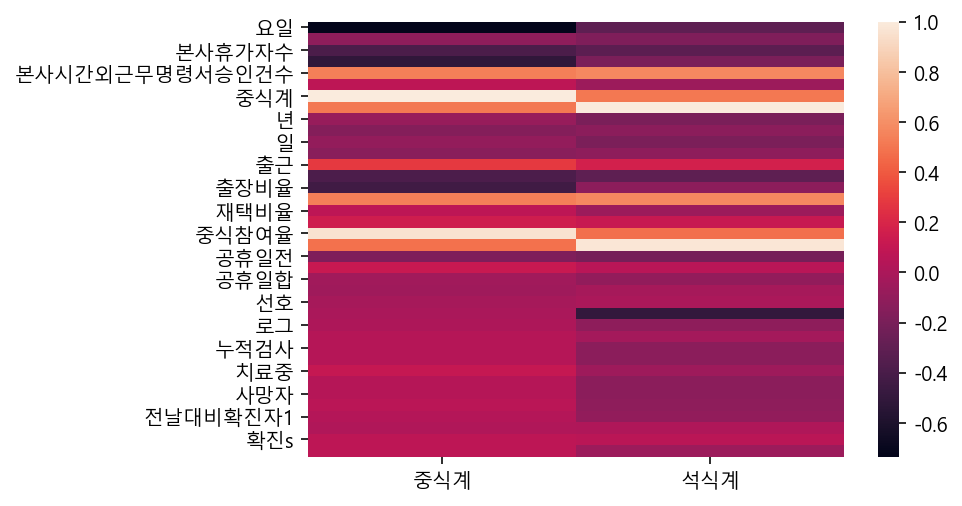

In [27]:
sns.heatmap(train_mer.corr()[['중식계', '석식계']])

In [28]:
train_mer.corr()[['중식계', '석식계']]

,중식계,석식계
요일,-0.734273,-0.313240
본사정원수,-0.115529,-0.173852
본사휴가자수,-0.391975,-0.316894
본사출장자수,-0.512680,-0.188164
본사시간외근무명령서승인건수,0.535611,0.571168
현본사소속재택근무자수,0.076509,-0.057534
중식계,1.000000,0.508287
석식계,0.508287,1.000000
년,-0.078804,-0.194792
월,-0.154664,-0.127142


In [34]:
train_time = train_mer[['중식계', '석식계', '요일', '년', '월', '일', '주','공휴일전', '공휴일후', '공휴일합', '계발']]

<AxesSubplot:>

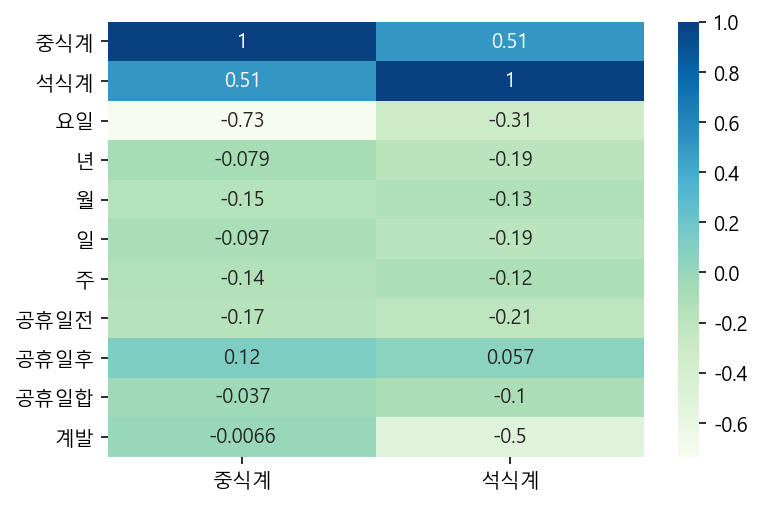

In [35]:
sns.heatmap(train_time.corr()[['중식계', '석식계']],annot=True, cmap='GnBu')